C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(250, 1000)
 Acc: 0.846809   f1: 0.843341   Precision: 0.763934   Recall: 1.000000 
 Acc: 0.972000   f1: 0.971940   Precision: 0.949275   Recall: 1.000000 
(500, 1000)
 Acc: 0.859574   f1: 0.856927   Precision: 0.779264   Recall: 1.000000 
 Acc: 0.966000   f1: 0.965837   Precision: 0.941980   Recall: 1.000000 
(750, 1000)
 Acc: 0.910638   f1: 0.909988   Precision: 0.847273   Recall: 1.000000 
 Acc: 0.969333   f1: 0.969261   Precision: 0.944578   Recall: 1.000000 
(1000, 1000)
 Acc: 0.929787   f1: 0.929482   Precision: 0.875940   Recall: 1.000000 
 Acc: 0.972000   f1: 0.971969   Precision: 0.947566   Recall: 1.000000 
(1250, 1000)
 Acc: 0.946809   f1: 0.946682   Precision: 0.903101   Recall: 1.000000 
 Acc: 0.974400   f1: 0.974379   Precision: 0.951589   Recall: 1.000000 
(1500, 1000)
 Acc: 0.951064   f1: 0.950967   Precision: 0.910156   Recall: 1.000000 
 Acc: 0.975333   f1: 0.975303   Precision: 0.954094   Recall: 1.000000 
(1750, 1000)
 Acc: 0.955319   f1: 0.955247   Precision: 0.917

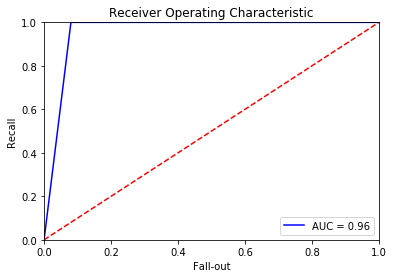

[[218  19]
 [  0 233]]


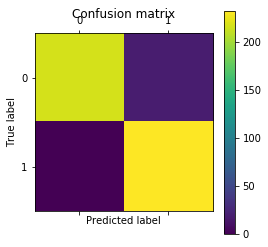

Populating the interactive namespace from numpy and matplotlib


C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'shuffle', 'floor', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


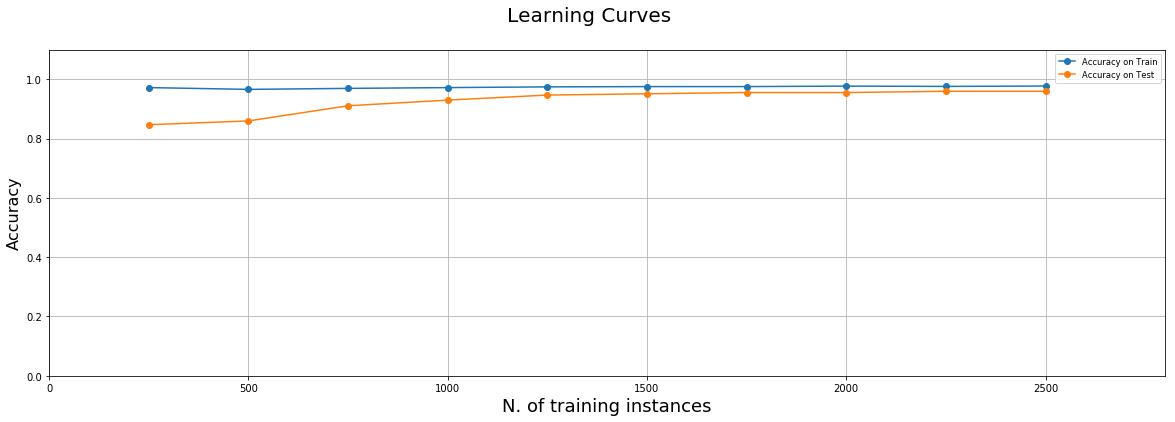

In [1]:
# -*- coding: utf-8 -*-
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from nltk import word_tokenize
from random import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.font_manager import FontProperties
from sklearn import metrics
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from sklearn.decomposition import PCA
import random
from pprint import pprint
from math import floor

# Reads ham and spam files
ham=[]
path='C:/Users/Admin/Desktop/Text Analytics & Engineering/tea_exercises_2017_18/Assignment 2/enron1/ham/'
dirs = os.listdir( path )
for filename in dirs:
        file = open(path+filename, "r", encoding="utf-8")   
        ham.append([file.read(), 0])
        file.close()

ham = ham[:1485]

spam=[]
path2='C:/Users/Admin/Desktop/Text Analytics & Engineering/tea_exercises_2017_18/Assignment 2/enron1/spam/'
dirs2 = os.listdir( path2 )
for filename2 in dirs2:
        try :
            with open(path2+filename2, "r", encoding="utf-8") as file2:
                spam.append([file2.read(), 1])
        except:
            pass

spam = spam[:1485]

# Concatenates and shuffles the dataset
dataset = ham + spam
shuffle(dataset)

train_set = dataset[:2500]
test_set = dataset[2500:]

# Reads class labels
label_train = [item[1] for item in train_set]
label_test = [item[1] for item in test_set]

train_set = [item[0] for item in train_set[:]]
test_set = [item[0] for item in test_set[:]]

vectorizer = TfidfVectorizer()
X_train_transformer = vectorizer.fit_transform(train_set)
X_train = X_train_transformer.toarray()

X_test_transformer = vectorizer.transform(test_set)
X_test = X_test_transformer.toarray()

# k may be either an integer greater than zero
# or a double between 0 and 1
def select_features_pca(train_X, test_X, k):
    selector = PCA(n_components=k)
    selector.fit(train_X)
    train_X = selector.transform(train_X)
    test_X = selector.transform(test_X)
    return train_X, test_X


# if the class with the minimum number of instances has n instances
# then all classes should have n instances where we randomly select
# n instances from the classes with more instances than n
# return the results of the classification in a dictionary
def benchmark(clf, train_X, train_y, test_X, test_y):
    """
    evaluate classification
    """
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    #print(pred)
    f1 = metrics.f1_score(test_y, y_pred, average='weighted')
    accuracy = metrics.accuracy_score(test_y, y_pred)
    precision = metrics.precision_score(test_y, y_pred)
    recall = metrics.recall_score(test_y, y_pred)
    print(" Acc: %f "%(accuracy), " f1: %f "%(f1), " Precision: %f "%(precision), " Recall: %f "%(recall))
    result = {'f1' : f1,
              'accuracy' : accuracy,
              'precision': precision,
              'recall': recall,
              'train size' : len(train_y), 
              'test size' : len(test_y), 
              'predictions': y_pred }
    return result

# PCA
k = 1000
train_x_sub, test_x_sub = select_features_pca(X_train, X_test, k)

# Train multiple classifiers and clf chooses the best one after multiple runs
params_knn = {'n_neighbors': [3,4,5,10], 'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsClassifier(), params_knn, cv = 5)
#knn.fit(train_x_sub, label_train)
#print("Best parameters according to the Gridsearch method are {}".format(knn.best_params_))

params_svm = {'C': [1, 5],
   'kernel': ['rbf', 'linear', 'poly'],
   'gamma' : [0.1, 0.3],
    'degree': [2,3,4]
}

svm = GridSearchCV(SVC(), params_svm, cv=5)
#svm.fit(train_x_sub, label_train)
#print("Best parameters according to the Gridsearch method are {}".format(svm.best_params_))

lr = LogisticRegression()
nb = GaussianNB()

# Here we finally select the best classifier after multiple runs
clf = lr

results = {}
results['train_size'] = []
results['on_test'] = []
results['on_train'] = []

for i in range(1,11):
    if(i==10):
        train_x_part = train_x_sub
        train_y_part = label_train
    else:
        to = int(floor(i*(train_x_sub.shape[0]/10)))
        train_x_part = train_x_sub[0:to,:]
        train_y_part = label_train[0:to]
    print(train_x_part.shape)
    results['train_size'].append(train_x_part.shape[0])
    result = benchmark(clf, train_x_part, train_y_part, test_x_sub, label_test)
    #pprint(result)
    results['on_test'].append((result['accuracy'], result['f1'], result['precision'], result['recall']))
    result = benchmark(clf, train_x_part, train_y_part, train_x_part, train_y_part)
    #pprint(result)
    results['on_train'].append((result['accuracy'], result['f1'], result['precision'], result['recall']))

predictions = clf.predict(test_x_sub)
false_positive_rate, recall, thresholds = roc_curve(label_test, predictions)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()


confusion_matrix = confusion_matrix(label_test, predictions)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

acc_on_train = [item[0] for item in results['on_train']]
acc_on_test = [item[0] for item in results['on_test']]

get_ipython().magic(u'matplotlib notebook')
get_ipython().magic(u'pylab inline')


pylab.rcParams['figure.figsize'] = (20, 6)

fontP = FontProperties()
fontP.set_size('small')
fig = plt.figure()
fig.suptitle('Learning Curves', fontsize=20)
ax = fig.add_subplot(111)
ax.axis([0, 2800, 0, 1.1])
line_up, = ax.plot( results['train_size'], acc_on_train, 'o-',label='Accuracy on Train')
line_down, = ax.plot( results['train_size'] , acc_on_test, 'o-',label='Accuracy on Test')

plt.xlabel('N. of training instances', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend([line_up, line_down], ['Accuracy on Train', 'Accuracy on Test'], prop = fontP)
plt.grid(True)



